## 1.用戶分群敘述性統計

In [1]:
#================================#
#===20201105用戶分群敘述性統計===#
#================================#
library(data.table)
library(dplyr)
setwd("D:/cw_intern/raw data")

Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
dat4 = fread("用戶看課分析(含產業別).csv") %>% as.data.frame()
sele = c(2,4,9)
dat4_1 = dat4[,sele]

In [3]:
CC = dat4_1 %>% 
  group_by(用戶ID,產業別 ) %>%
  summarise(產業別用戶人數 = n()) %>%
  arrange(desc(產業別用戶人數))


`summarise()` regrouping output by '用戶ID' (override with `.groups` argument)



,p,q
公部門,1572,73037
服務業,4770,445414
金融業,6754,520583
科技業,5515,227678
製造業,3295,308107


[1] 117   2

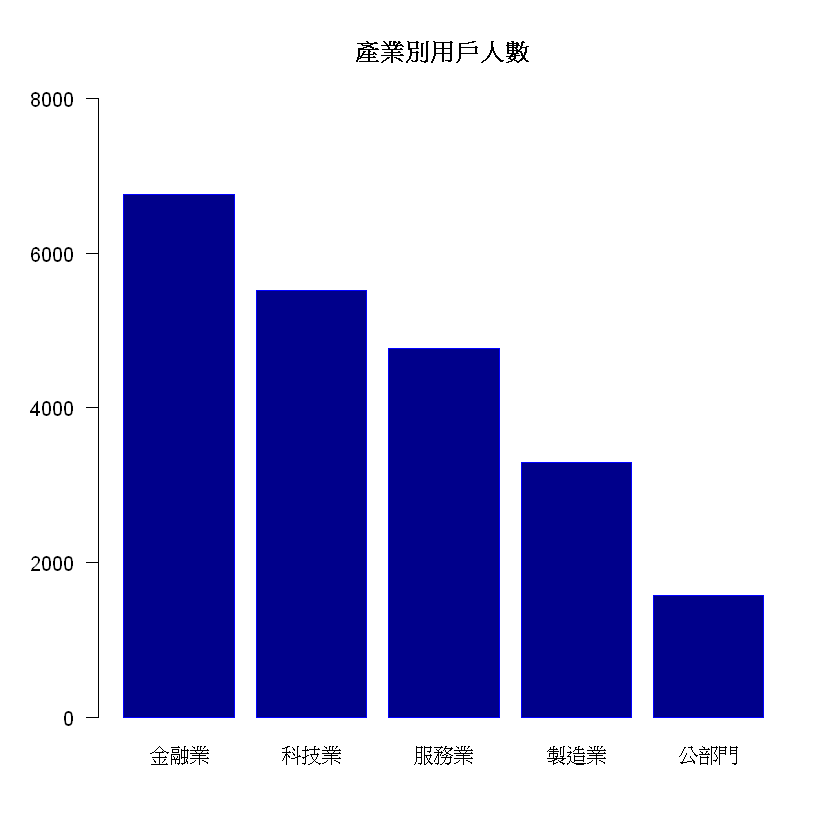

In [4]:
p = tapply(CC$用戶ID,CC$產業別, length)

barplot(sort(p, decreasing = T)
        , ylim = c(0,8000),las=1,
        border='blue', col='darkblue',
        main='產業別用戶人數')
q = tapply(dat4$用戶ID, dat4$產業別, length)
cbind(p,q)
a = unique(cbind(dat4$公司名稱,dat4$產業別)) 
dim(a)

Warning message in as.vector(as.numeric(x)):
"強制變更過程中產生了 NA"


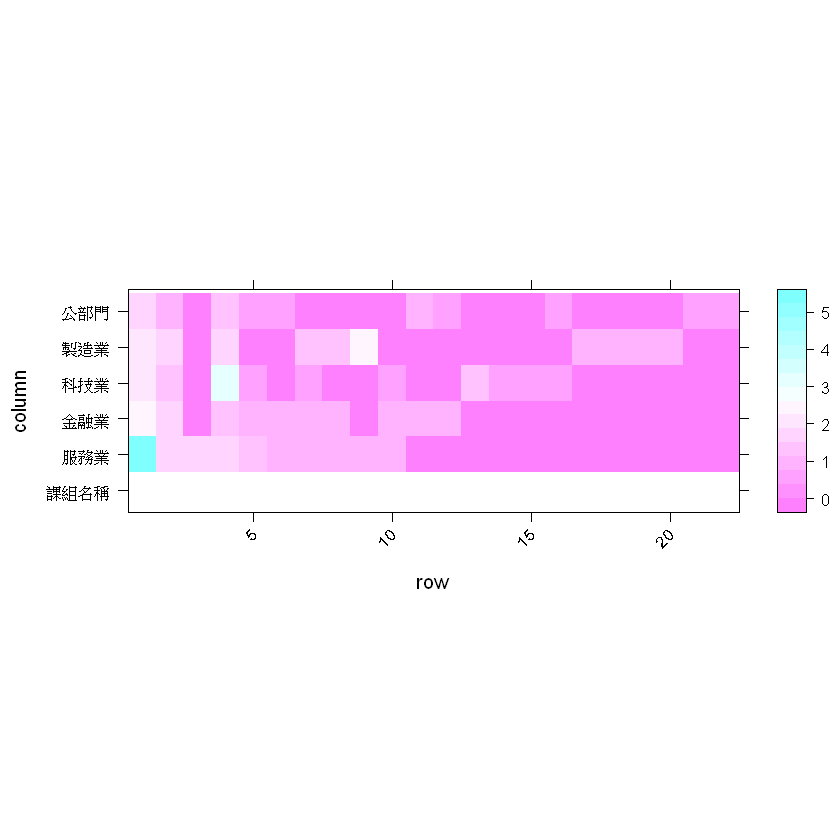

In [11]:
setwd("D:/cw_intern/csv_for_R")
heat = read.csv("heatmap用1106.csv") %>% as.data.frame()

colors = colorRampPalette( 
  RColorBrewer::brewer.pal(9, "Blues"))(255)

lattice::levelplot(as.matrix(heat), scale=list(x=list(rot=45)))

## 2.進入網站時間差

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   7.192   7.000 242.000 

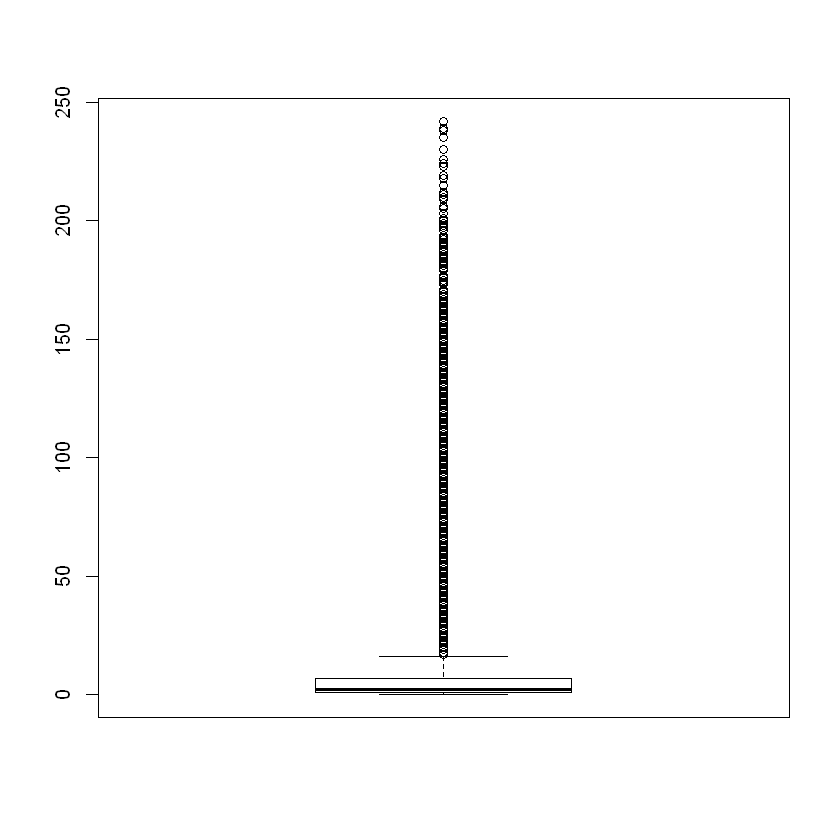

In [6]:
setwd("D:/cw_intern/csv_for_R")
library(dplyr)
## 所有產業、公司的所有用戶進入網站日期差
df = read.csv("登入時間_次數分配.csv")
all = rep(df$logindate, df$Freq)
summary(all)
all %>% boxplot()


In [9]:
## 依產業別區分
df = read.csv("登入時間差.csv")

FI = df[df$產業別 == "金融業",]
FI = FI$diff	
FI = (FI) %>% sort() 
summary(FI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   9.102   8.000 242.000 

In [8]:
SI = df[df$產業別 == "服務業",]
SI = SI$diff
SI = (SI) %>% sort() 
summary(SI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   7.616   7.000 235.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   7.659   7.000 239.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   7.255   7.000 223.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    4.00   10.98   10.00  205.00 

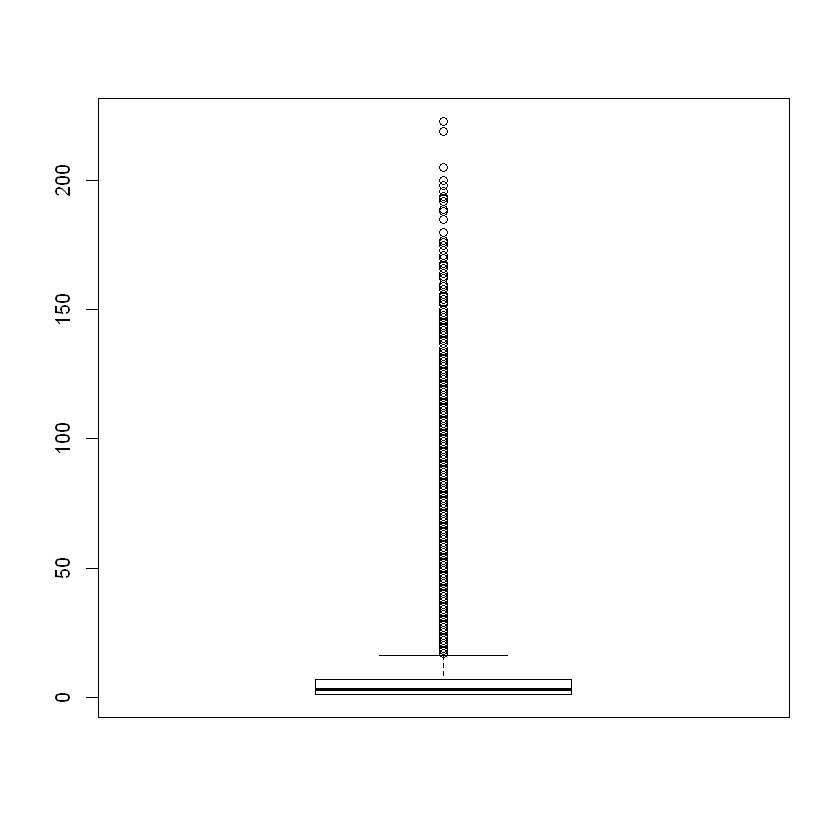

In [12]:
TI = df[df$產業別 == "科技業",]
TI = TI$diff
TI = (TI) %>% sort() 
summary(TI)


MI = df[df$產業別 == "製造業",]
MI = MI$diff
MI = (MI) %>% sort() 
summary(MI)
MI %>% boxplot()

PS = df[df$產業別 == "公部門",]
PS = PS$diff
PS = (PS) %>% sort() 
summary(PS)

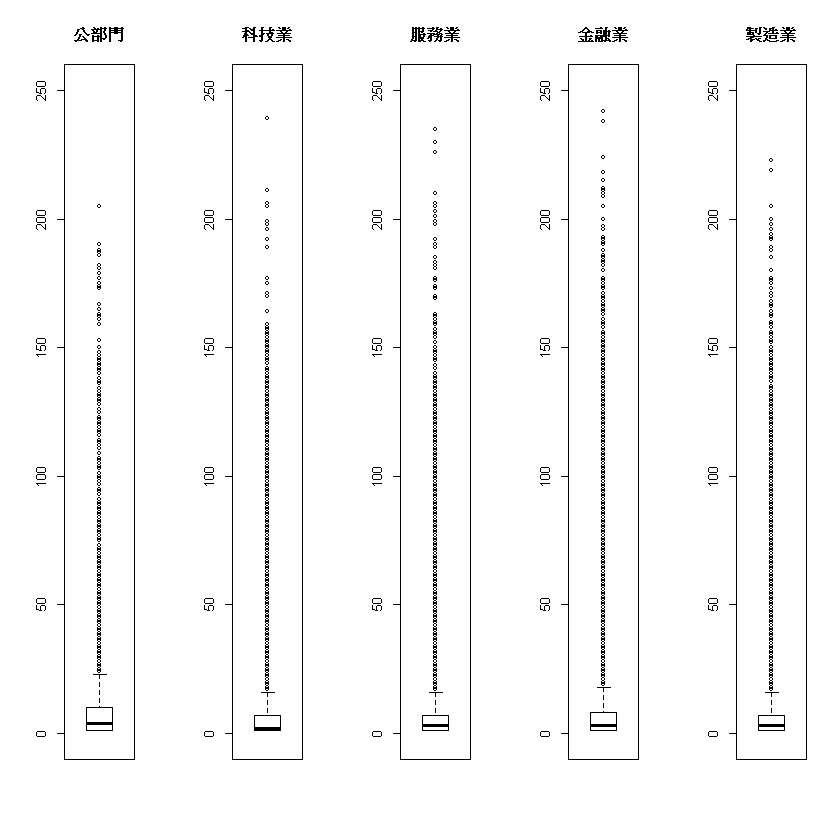

In [13]:
par(mfrow=c(1,5))
PS %>% boxplot(ylim = c(0,250), main = "公部門")
TI %>% boxplot(ylim = c(0,250), main = "科技業")
SI %>% boxplot(ylim = c(0,250), main = "服務業")
FI %>% boxplot(ylim = c(0,250), main = "金融業")
MI %>% boxplot(ylim = c(0,250), main = "製造業")

In [14]:
class = c("公部門","科技業","服務業","金融業","製造業")
qua0.9 = c(quantile(PS,0.9),quantile(TI,0.9),quantile(SI,0.9),
quantile(FI,0.9),quantile(MI,0.9)) %>% as.numeric()
date0.9 = rbind(qua0.9,class) %>% as.data.frame()


In [16]:

# ===================== #
FI = df[df$產業別 == "金融業",]
SI = df[df$產業別 == "服務業",]
TI = df[df$產業別 == "科技業",]
MI = df[df$產業別 == "製造業",]
PS = df[df$產業別 == "公部門",]


# 總用戶數 16501
FI0.9 = FI[FI$diff > 22,]
#FI0.9$用戶ID %>% unique() #  3128

SI0.9 = SI[SI$diff > 19,]
#SI0.9$用戶ID %>% unique() #  2578

TI0.9 = TI[TI$diff > 19,]
#TI0.9$用戶ID %>% unique() #  1848

MI0.9 = MI[MI$diff > 19,]
#MI0.9$用戶ID %>% unique() #  1822

PS0.9 = PS[PS$diff > 19,]
#PS0.9$用戶ID %>% unique() #  667

3128+2578+1848+1822+667
10043/16501

[1] 10043

[1] 0.6086298

In [22]:

## ======== 1217 10月11月的資料  ======== ##
setwd("D:/cw_intern/csv_for_R")
library(dplyr)
login_time = read.csv("10月-11月登入時間_產業別.csv")

FI = login_time[login_time$產業別 == "金融業",]
FI = FI$diff
FI = (FI) %>% sort() 
summary(FI)

SI = login_time[login_time$產業別 == "服務業",]
SI = SI$diff
SI = (SI) %>% sort() 
summary(SI)

TI = login_time[login_time$產業別 == "科技業",]
TI = TI$diff
TI = (TI) %>% sort() 
summary(TI)


MI = login_time[login_time$產業別 == "製造業",]
MI = MI$diff
MI = (MI) %>% sort() 
summary(MI)


PS = login_time[login_time$產業別 == "公部門",]
PS = PS$diff
PS = (PS) %>% sort() 
summary(PS)






   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   5.074   6.000  57.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   5.158   6.000  56.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   5.417   7.000  58.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   5.164   7.000  56.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   5.315   7.000  58.000 

ERROR: Error in `[.data.frame`(x, order(x, na.last = na.last, decreasing = decreasing)): undefined columns selected


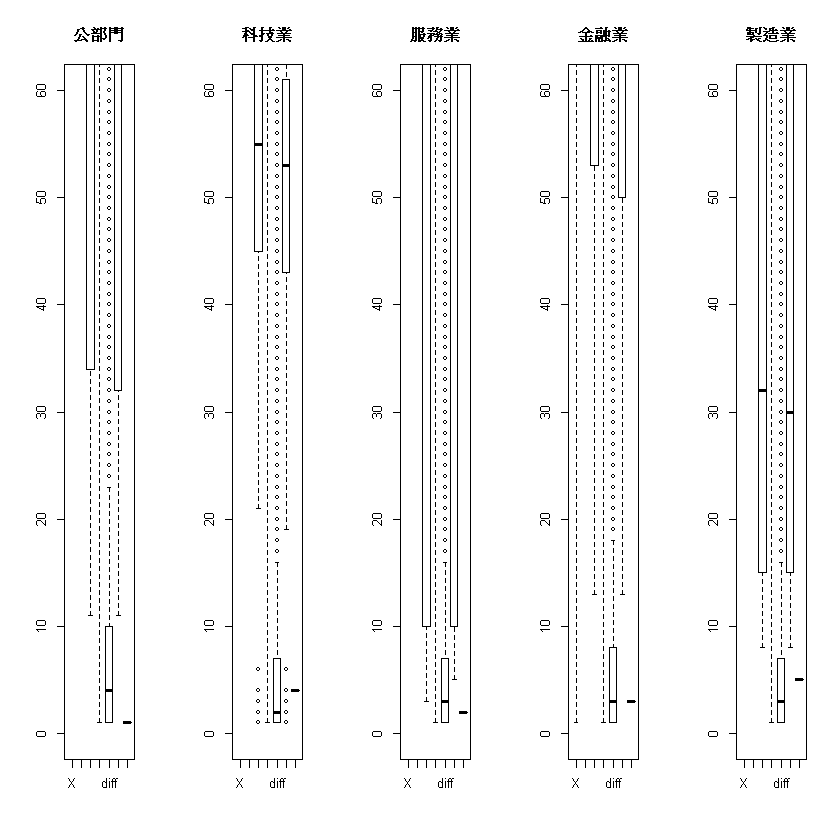

In [21]:

par(mfrow=c(1,5))
PS %>% boxplot(ylim = c(0,60), main = "公部門")
TI %>% boxplot(ylim = c(0,60), main = "科技業")
SI %>% boxplot(ylim = c(0,60), main = "服務業")
FI %>% boxplot(ylim = c(0,60), main = "金融業")
MI %>% boxplot(ylim = c(0,60), main = "製造業")

class = c("公部門","科技業","服務業","金融業","製造業")
qua0.9 = c(quantile(PS,0.9),quantile(TI,0.9),quantile(SI,0.9),
           quantile(FI,0.9),quantile(MI,0.9)) %>% as.numeric()
date0.9 = rbind(qua0.9,class) %>% as.data.frame()

# ===================== #

In [20]:
# 重複
FI = login_time[login_time$產業別 == "金融業",]
SI = login_time[login_time$產業別 == "服務業",]
TI = login_time[login_time$產業別 == "科技業",]
MI = login_time[login_time$產業別 == "製造業",]
PS = login_time[login_time$產業別 == "公部門",]

# 總用戶數 8725
login_time$用戶ID %>% unique() %>% length()


FI0.9 = FI[FI$diff > 13,]
FI0.9$用戶ID %>% unique() -> FI_lost_users 
FI_lost_users %>% length()  #  1484

SI0.9 = SI[SI$diff > 13,]
SI0.9$用戶ID %>% unique() -> SI_lost_users 
SI_lost_users %>% length() #  1137
TI0.9 = TI[TI$diff > 14,]
TI0.9$用戶ID %>% unique() -> TI_lost_users 
TI_lost_users %>% length() #  613

MI0.9 = MI[MI$diff > 13,]
MI0.9$用戶ID %>% unique() -> MI_lost_users 
MI_lost_users %>% length() #  887

PS0.9 = PS[PS$diff > 14,] 
PS0.9$用戶ID %>% unique() -> PS_lost_users 
PS_lost_users %>% length() #  388

1484+887+388+1137+613
4509/8725


ERROR: Error in eval(expr, envir, enclos): 找不到物件 'login_time'


In [19]:
#write.xlsx(FI_lost_users, "lost_users.xlsx",sheetName = "金融業", 
           col.names = F, row.names = F, append = FALSE)
#write.xlsx(TI_lost_users, "lost_users.xlsx",sheetName = "科技業", 
           col.names = F, row.names = F, append = TRUE)
#write.xlsx(SI_lost_users, "lost_users.xlsx",sheetName = "服務業", 
           col.names = F, row.names = F, append = TRUE)
#write.xlsx(MI_lost_users, "lost_users.xlsx",sheetName = "製造業", 
           col.names = F, row.names = F, append = TRUE)
#write.xlsx(PS_lost_users, "lost_users.xlsx",sheetName = "公部門", 
           col.names = F, row.names = F, append = TRUE)





ERROR: Error in parse(text = x, srcfile = src): <text>:2:25: 未預期的 ','
1: #write.xlsx(FI_lost_users, "lost_users.xlsx",sheetName = "金融業", 
2:            col.names = F,
                           ^


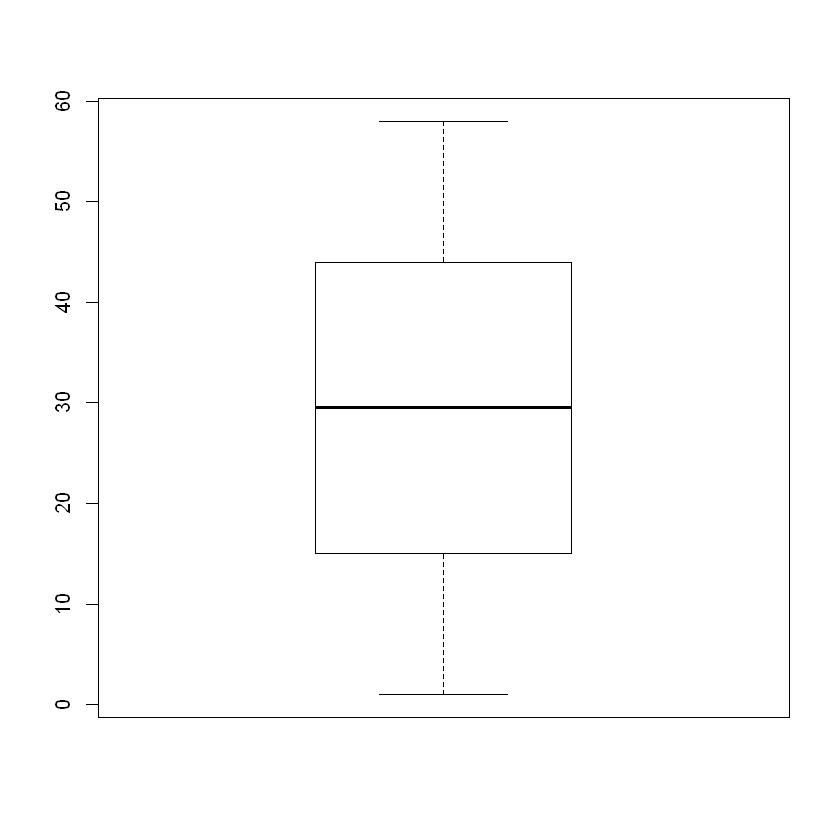

In [17]:

ti = read.csv("10月-11月登入時間_次數分配.csv")
ti$diff %>% boxplot()